In [13]:
import os
import cv2
import pandas as pd
import numpy as np

import torch
import matplotlib.pyplot as plt

In [14]:
# RLE 인코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [15]:
class show_img:
    def __init__(self,  csv_file, idx):
        self.data_test = pd.read_csv('./test.csv')
        self.data = pd.read_csv(csv_file)
        self.idx = idx

    def img_csv(self):
        img_path = self.data_test.iloc[self.idx, 1]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask_rle = self.data.iloc[self.idx, 1]
        mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))

        mask_image = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
        mask_image[mask == 1] = [255, 0, 0]
        mask_image[mask == 0] = [0, 0, 0]

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(mask_image)
        axs[0].axis('off')
        axs[1].imshow(image)
        axs[1].axis('off')

        plt.show()

0


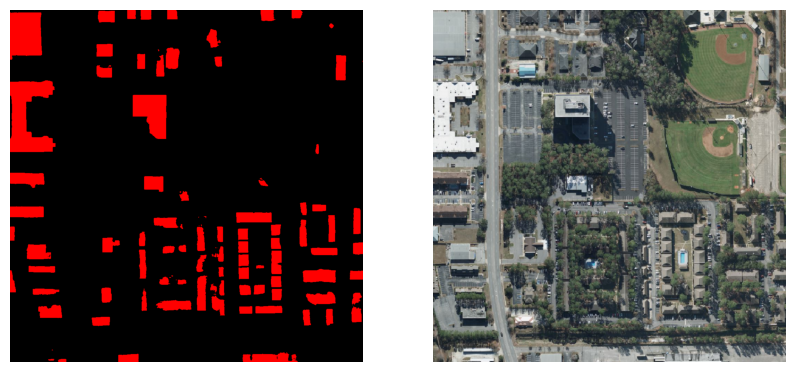

1


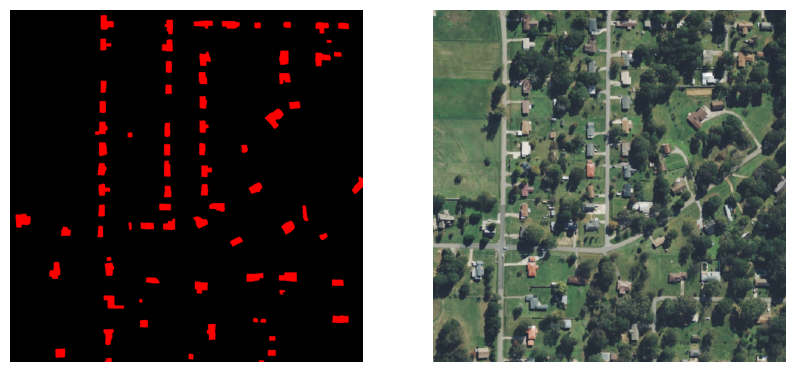

2


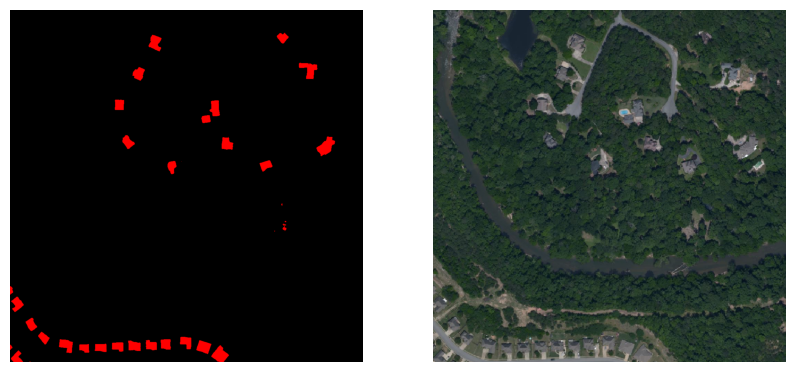

3


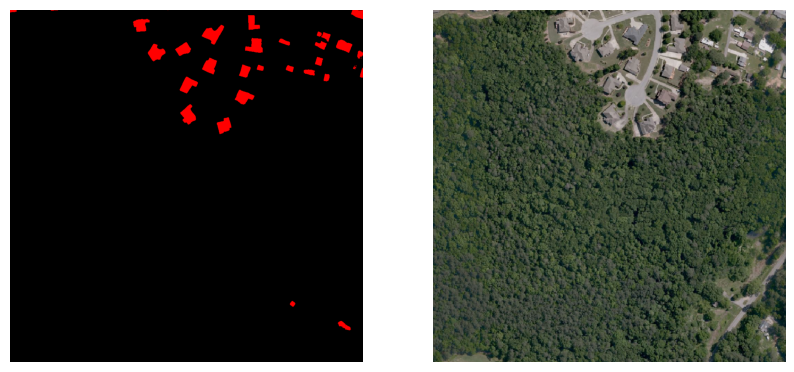

4


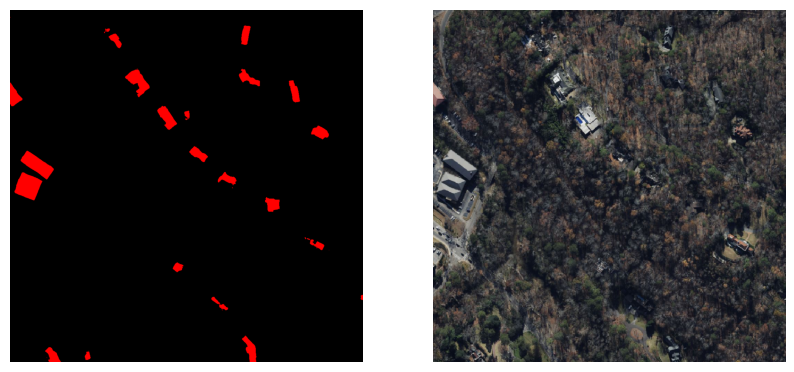

5


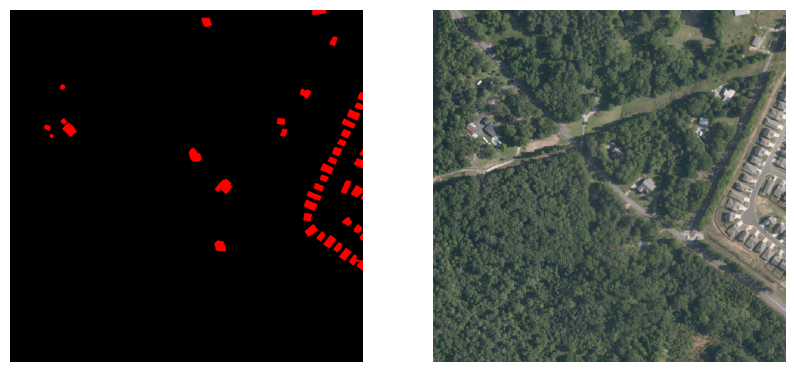

6


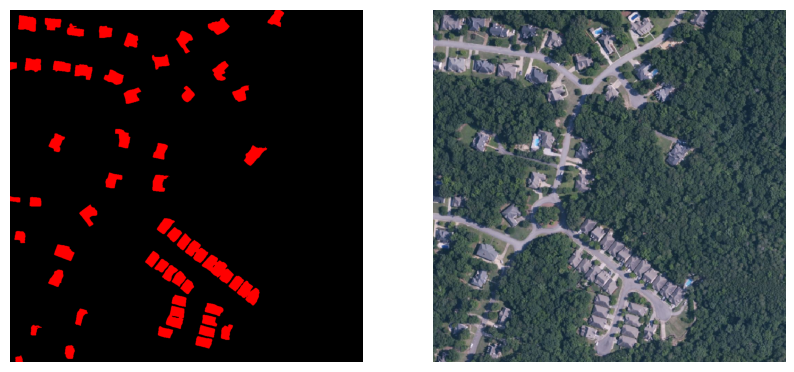

7


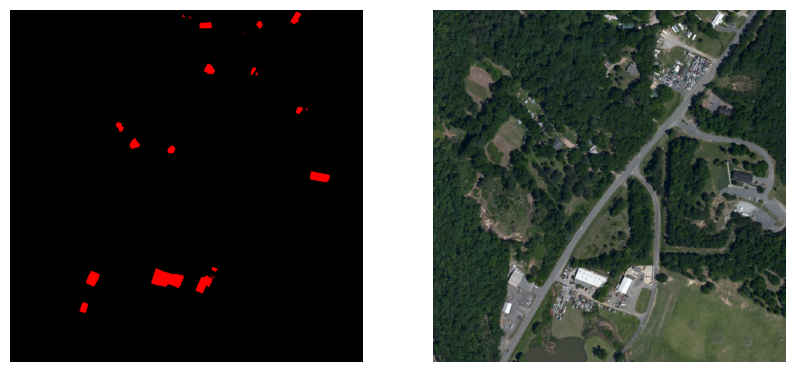

8


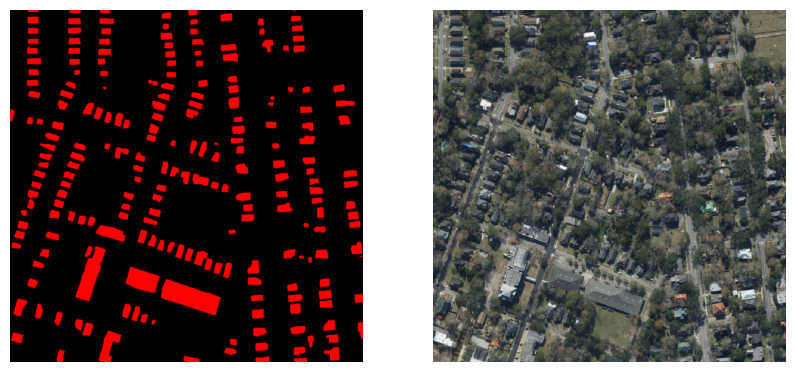

9


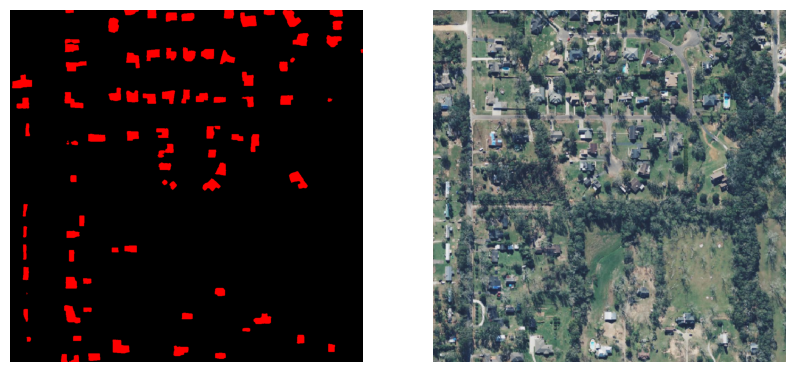

In [16]:
for i in range(0, 10):
    dataset = show_img('./submit.csv', i)
    
    print(i)
    dataset.img_csv()